# Data Scaling
Scaling data to a uniform range

## Heart Failure Dataset

### Imports and data loading

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

" _Scaling transformations may be accomplished using both StandardScaler and MinMaxScaler classes from the sklearn.preprocessing package. While the Standard Scaler implements the z-score transformation (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), the MinMaxScaler normalizes a variable to lie between a given minimum and maximum value, often between 0 and 1 (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler). Be careful, that it can only be applied to numerical data, without any missing value._ "

We know from previous analysis that there are no missing values in this dataset, and that there exists a total of 7 numeric variables that are not binary - age, creatinine_phosphokinase, ejection_fraction, plateletes, serum_creatinine, serum_sodium, time.

Lets look at their out-of-the-box values (and store a new data variable that has only the non-binary variables)

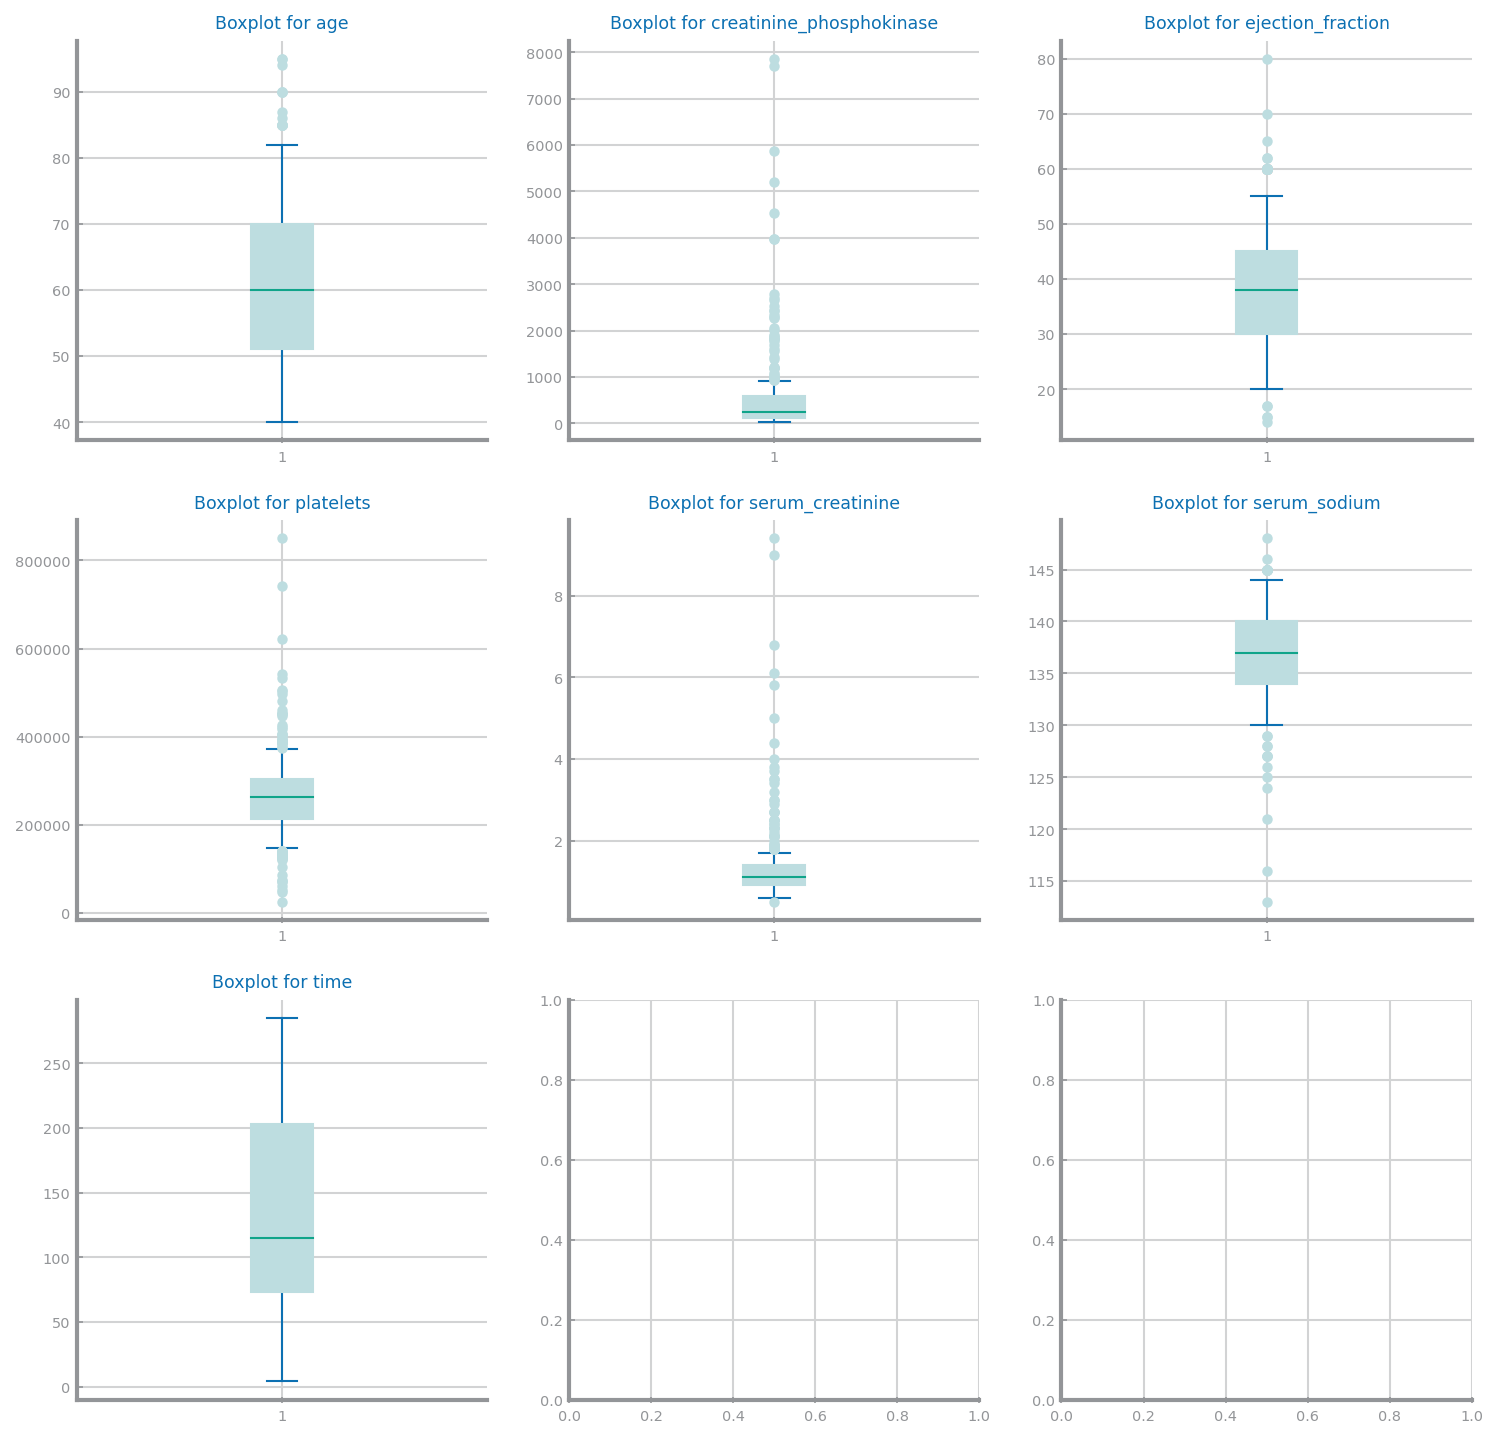

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [4]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(7) #numero de variaveis non bolean
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

numeric_data = data
binary_data = data

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
        numeric_data = numeric_data.drop(columns=[data.columns[n]], axis=1) #Remove binary columns

    else:
        binary_data = binary_data.drop(columns=[data.columns[n]], axis=1) #Remove non-binary columns

        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

numeric_data.head()

Let us try to scale these values.

### Standard Scaler (Standardize)

In [3]:
transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(numeric_data)
scaledData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)

scaledData.describe(include='all')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.265205e-16,3.713120e-18,3.341808e-18,1.009969e-16,-2.227872e-18,-8.627435e-16,-1.069379e-16
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-5.769178e-01,-2.038387e+00,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.629502e+00
25%,-8.281242e-01,-4.803931e-01,-6.841802e-01,-5.208700e-01,-4.782047e-01,-5.959961e-01,-7.389995e-01
50%,-7.022315e-02,-3.425744e-01,-7.076750e-03,-1.390846e-02,-2.845524e-01,8.503384e-02,-1.969543e-01
75%,7.718891e-01,1.657284e-04,5.853888e-01,4.111199e-01,5.926150e-03,7.660638e-01,9.387595e-01
max,2.877170e+00,7.514640e+00,3.547716e+00,6.008180e+00,7.752020e+00,2.582144e+00,1.997038e+00


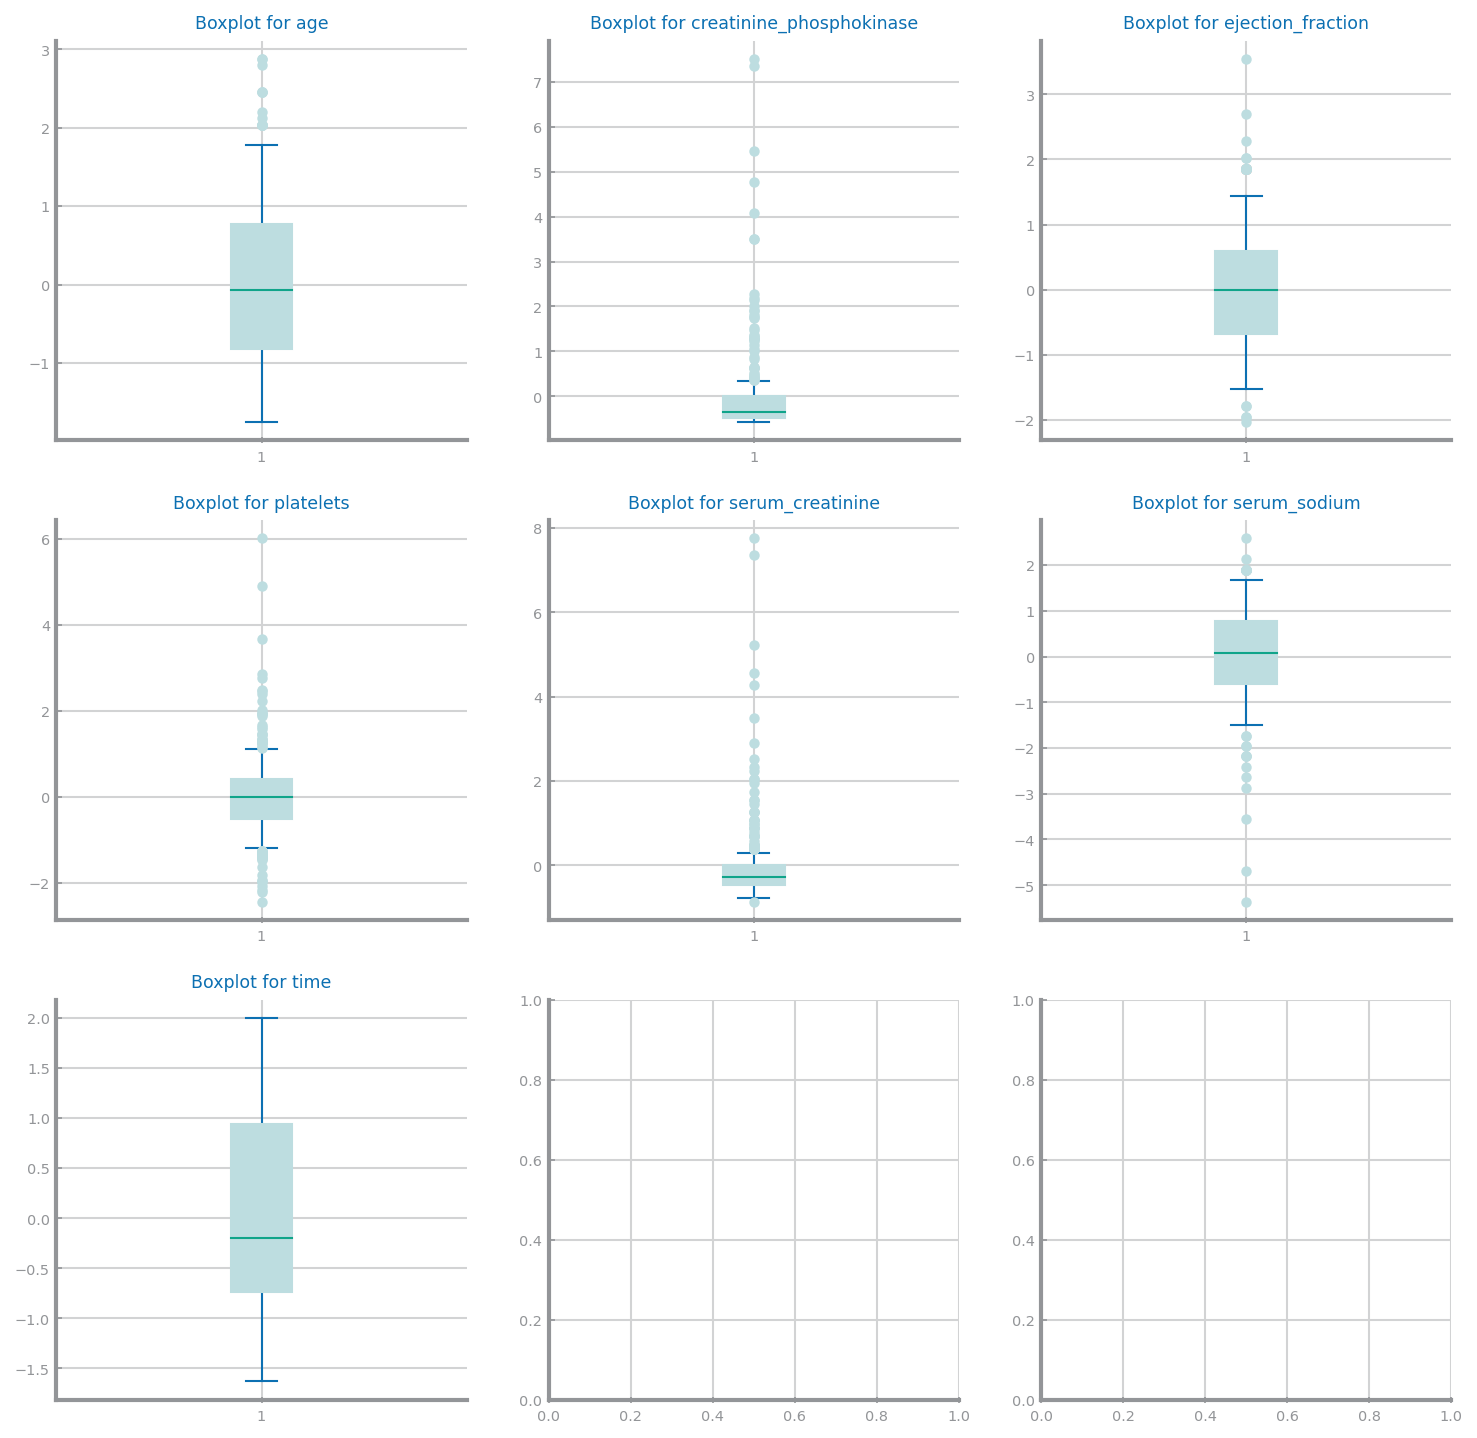

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [4]:
numeric_vars = scaledData.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(7) #numero de variaveis non bolean
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(scaledData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(scaledData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

scaledData.head()

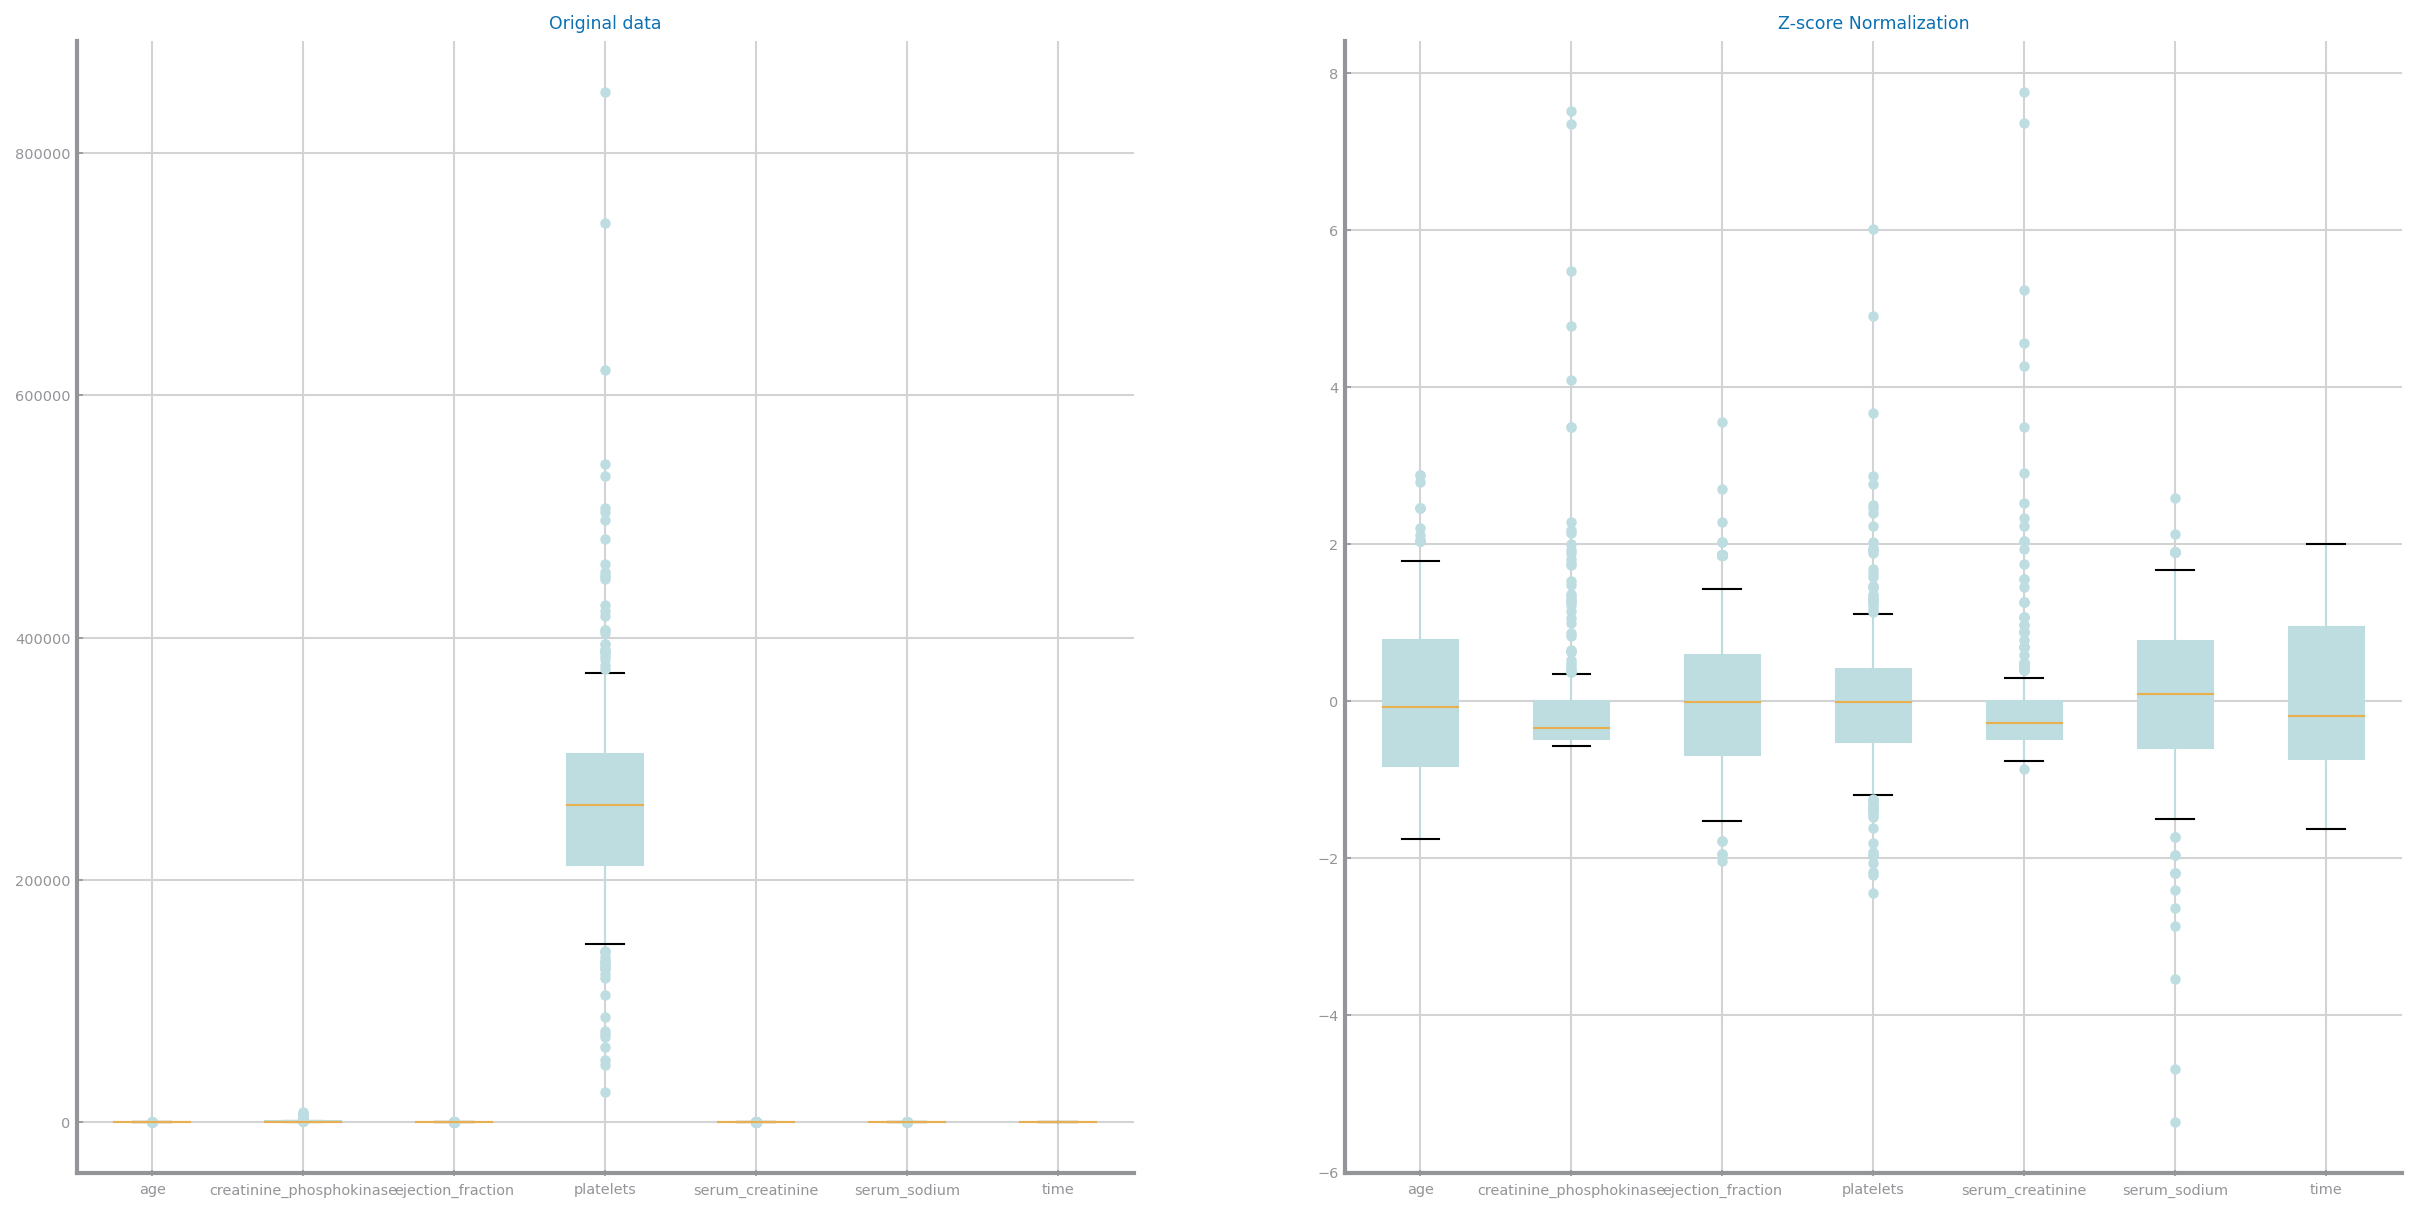

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(20,10),squeeze=False)

axs[0, 0].set_title('Original data')
numeric_data.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('Z-score Normalization')
scaledData.boxplot(ax=axs[0, 1])

### MinMax Scaler (Normalize)

In [6]:
transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.378798,0.071299,0.364903,0.288833,0.100436,0.675012,0.449327
std,0.216269,0.123793,0.179316,0.118565,0.116237,0.126071,0.276207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.011929,0.242424,0.227179,0.044944,0.600000,0.245552
50%,0.363636,0.028961,0.363636,0.287186,0.067416,0.685714,0.395018
75%,0.545455,0.071319,0.469697,0.337495,0.101124,0.771429,0.708185
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


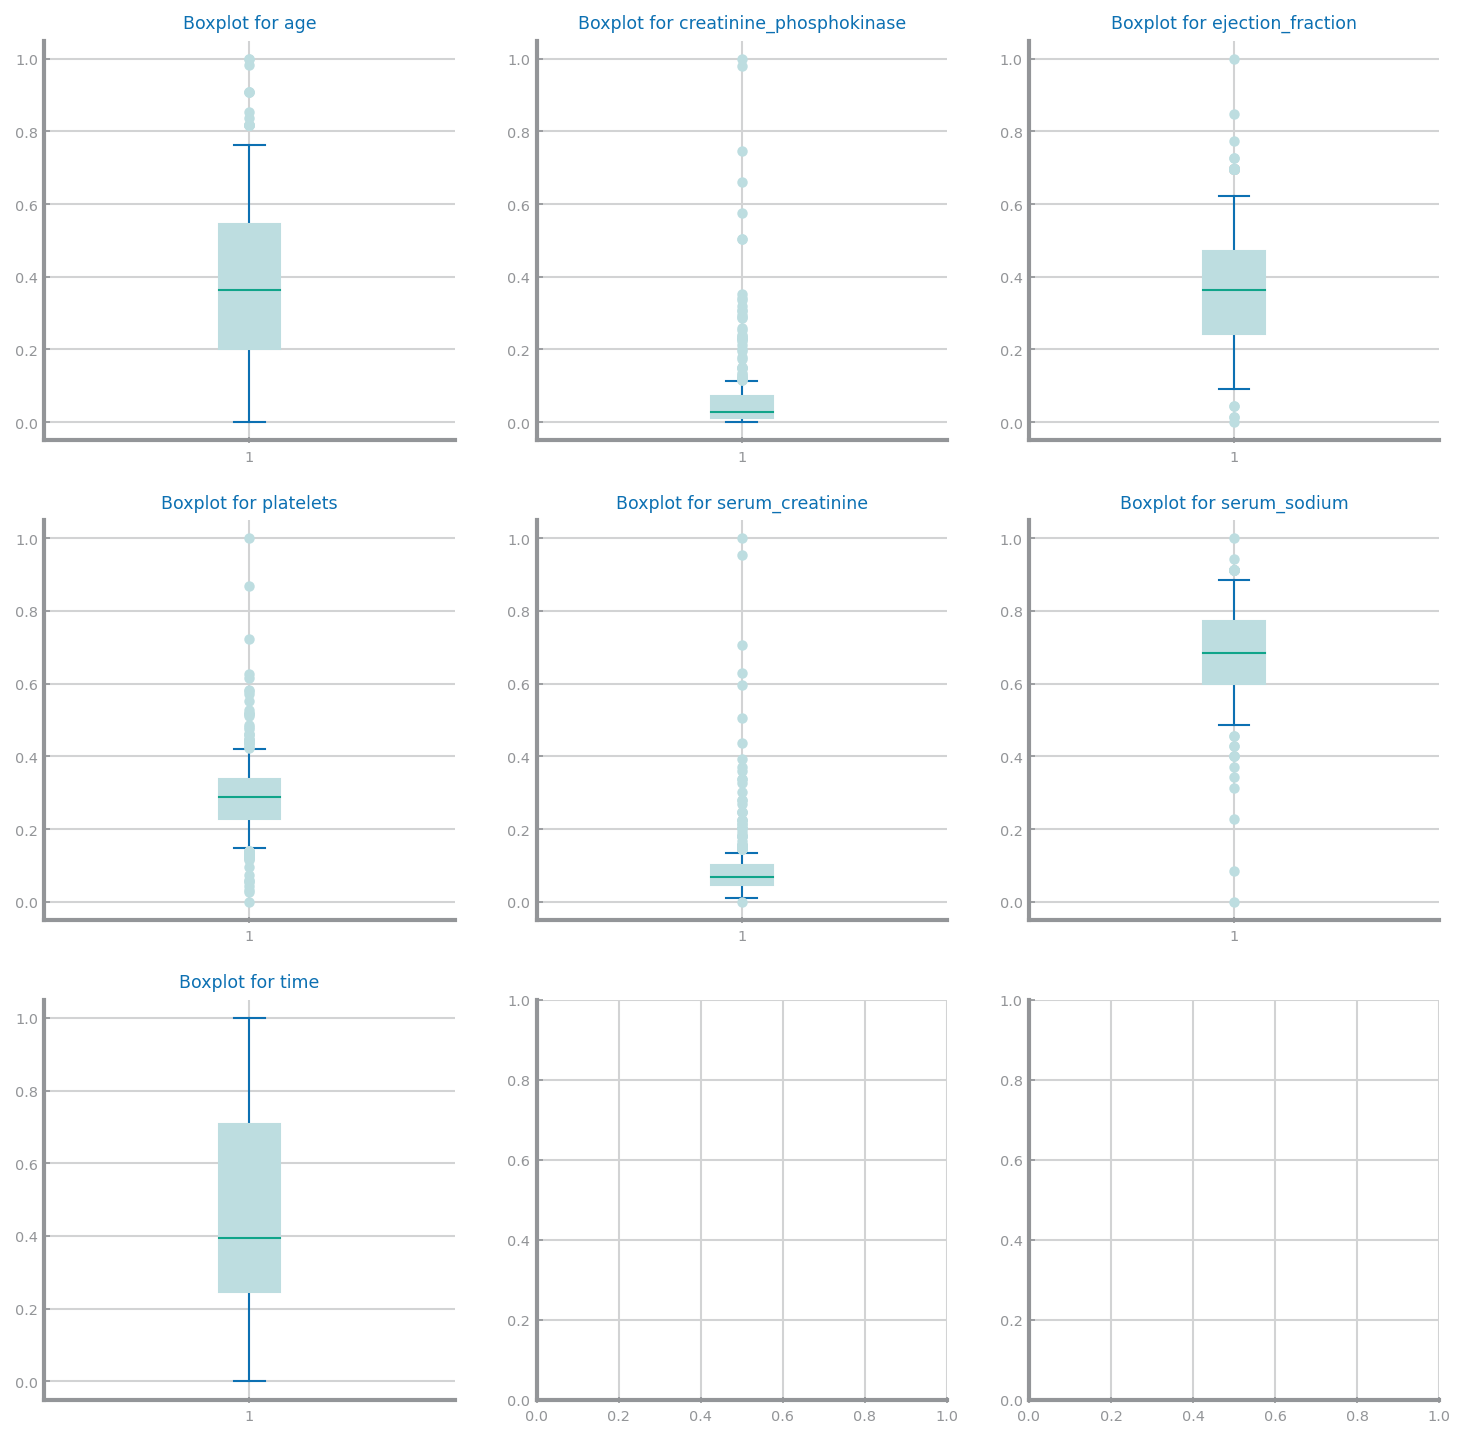

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


In [7]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(7) #numero de variaveis non bolean
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

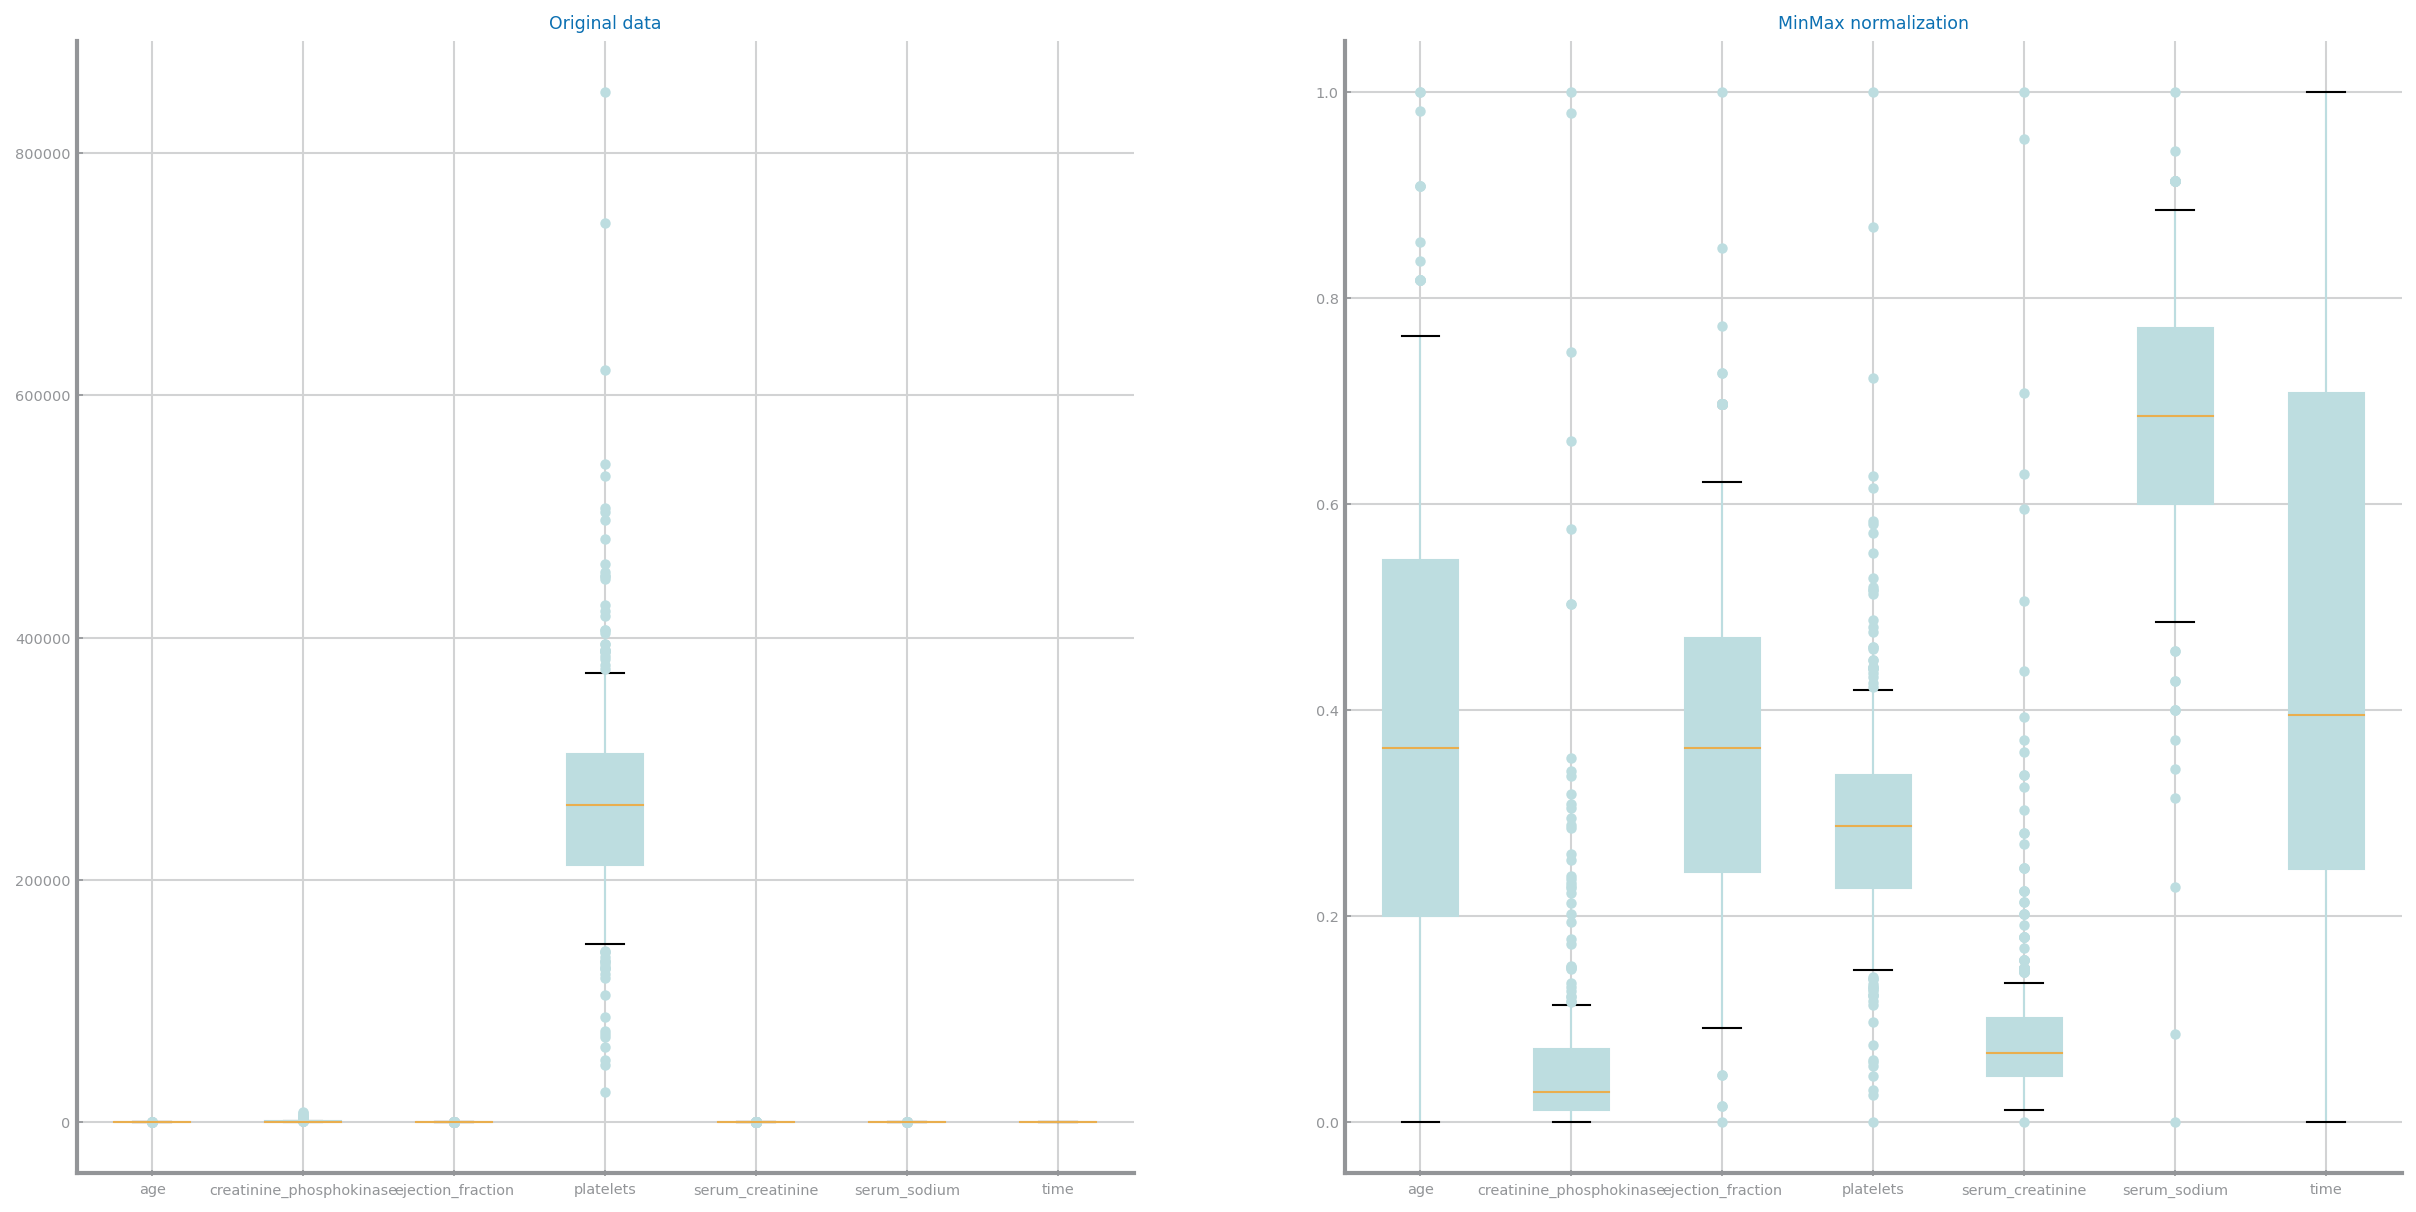

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20,10),squeeze=False)

axs[0, 0].set_title('Original data')
numeric_data.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('MinMax normalization')
minMaxData.boxplot(ax=axs[0, 1])

### Standard vs MinMax

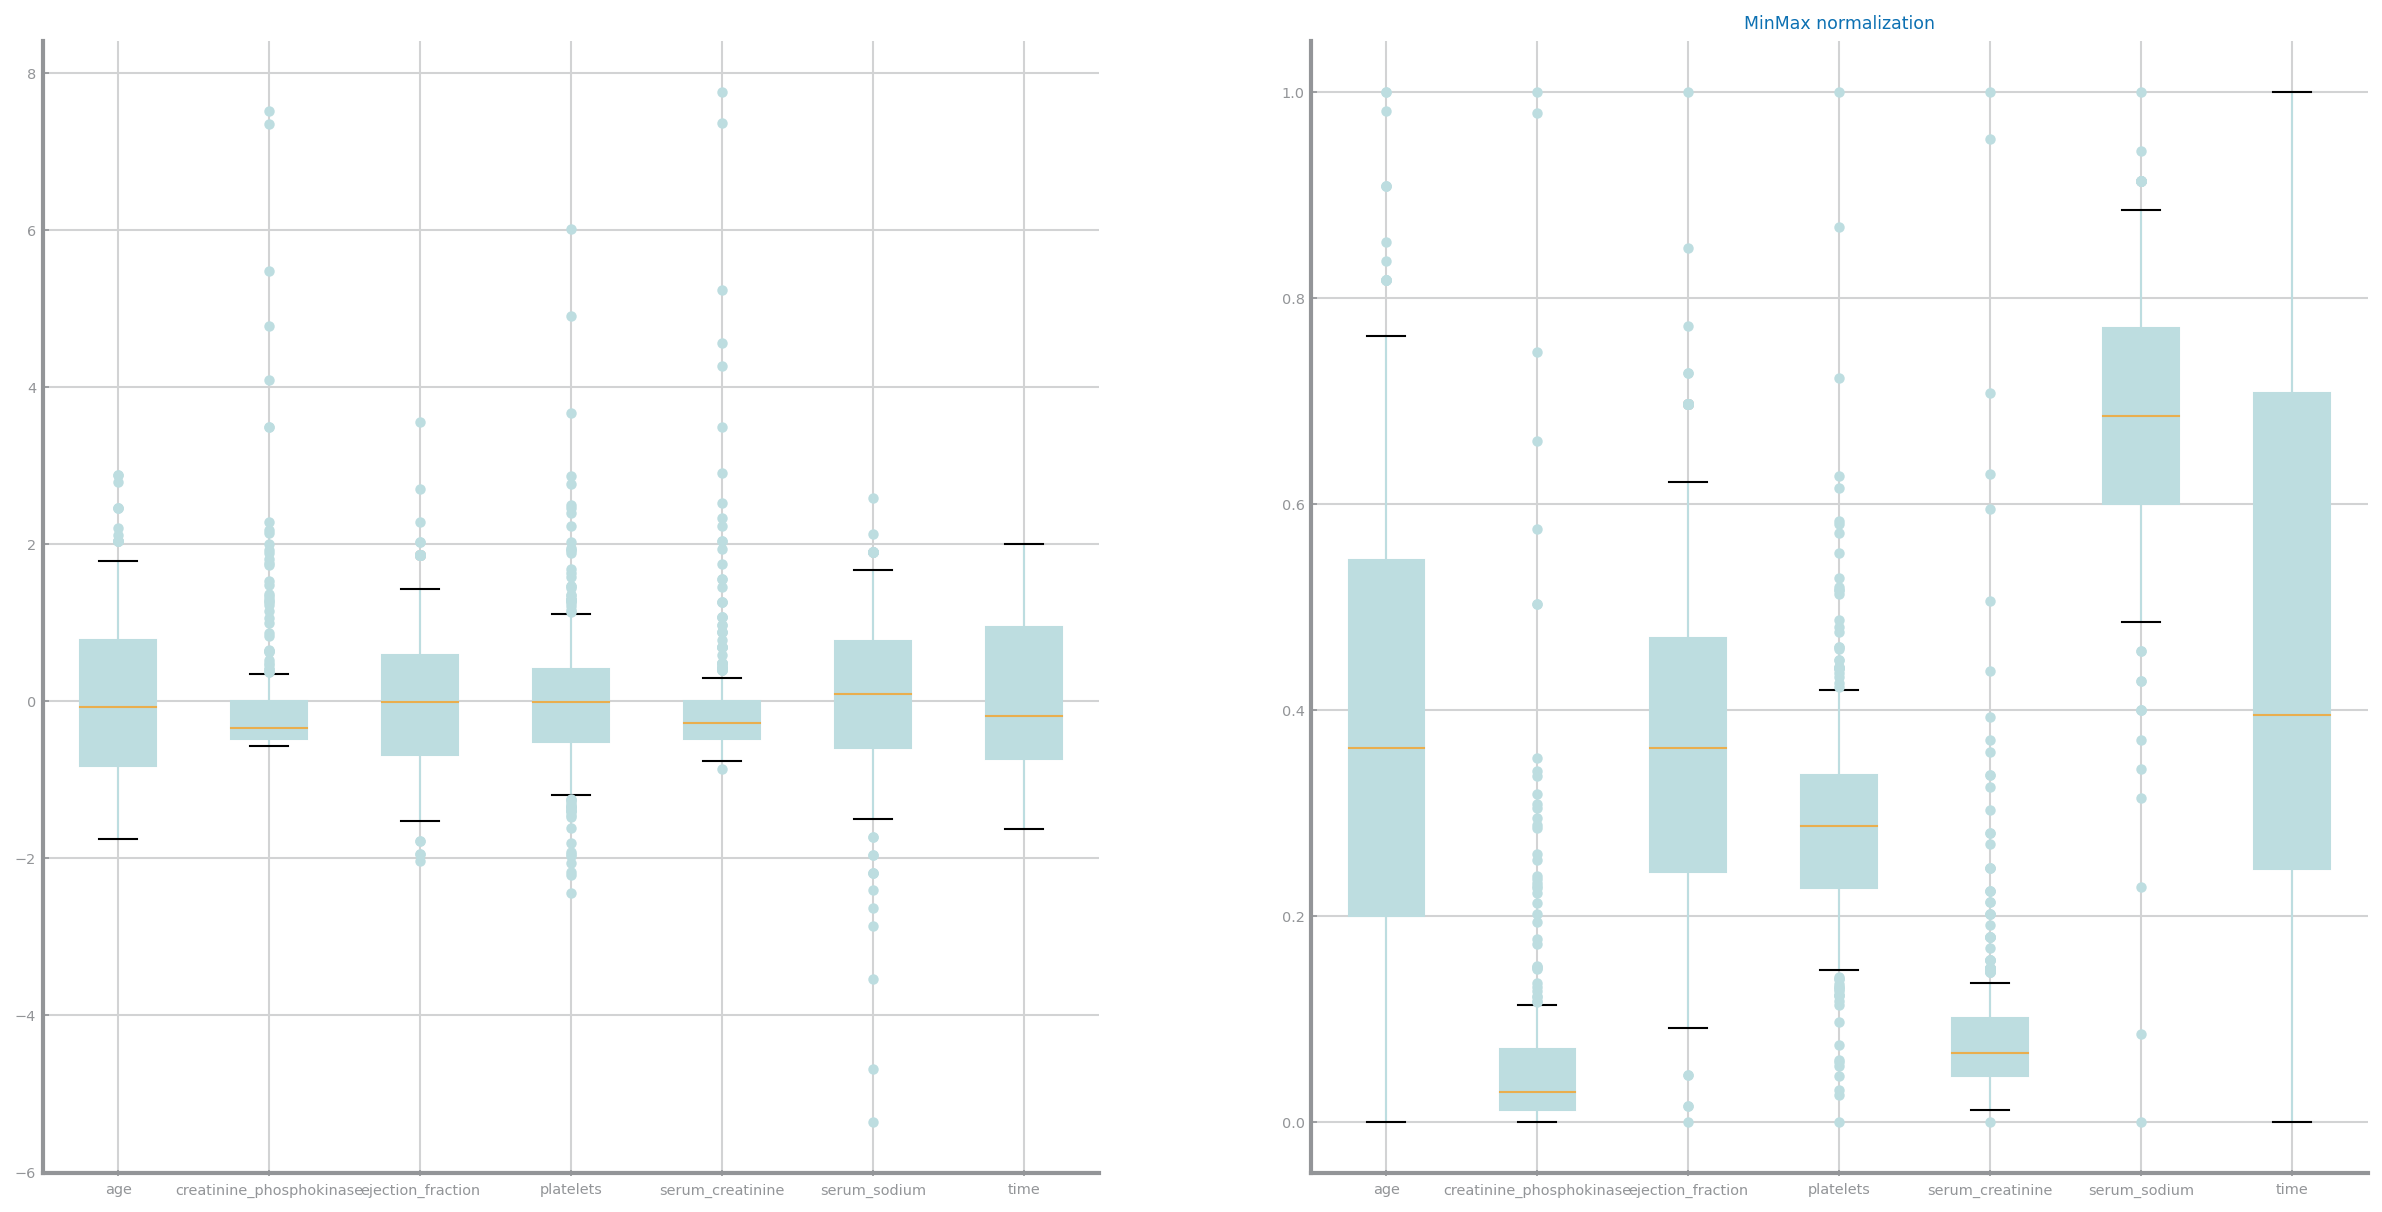

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20,10),squeeze=False)

axs[0, 1].set_title('Z-score Normalization')
scaledData.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('MinMax normalization')
minMaxData.boxplot(ax=axs[0, 1])

### Storing scaled dataset

In [10]:
#Store MinMaxScaler
minMaxDataFull = minMaxData.join(binary_data, how='right')
minMaxDataFull.to_csv(r'../datasets/hf_scaled/HF_normalized.csv', index = False)

#Store StandardScaler
scaledDataFull = scaledData.join(binary_data, how='right')
scaledDataFull.to_csv(r'../datasets/hf_scaled/HF_standardized.csv', index = False)

<br />
<br />
<br />
<br />

## Balanced Heart Failure Dataset

Dataset created in the Balancing module

### Imports and data loading

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('../datasets/hf_balanced/HF_balanced.csv')

We know from previous analysis that there are no missing values in this dataset, and that there exists a total of 7 numeric variables that are not binary - age, creatinine_phosphokinase, ejection_fraction, plateletes, serum_creatinine, serum_sodium, time.

Lets look at their out-of-the-box values (and store a new data variable that has only the non-binary variables)

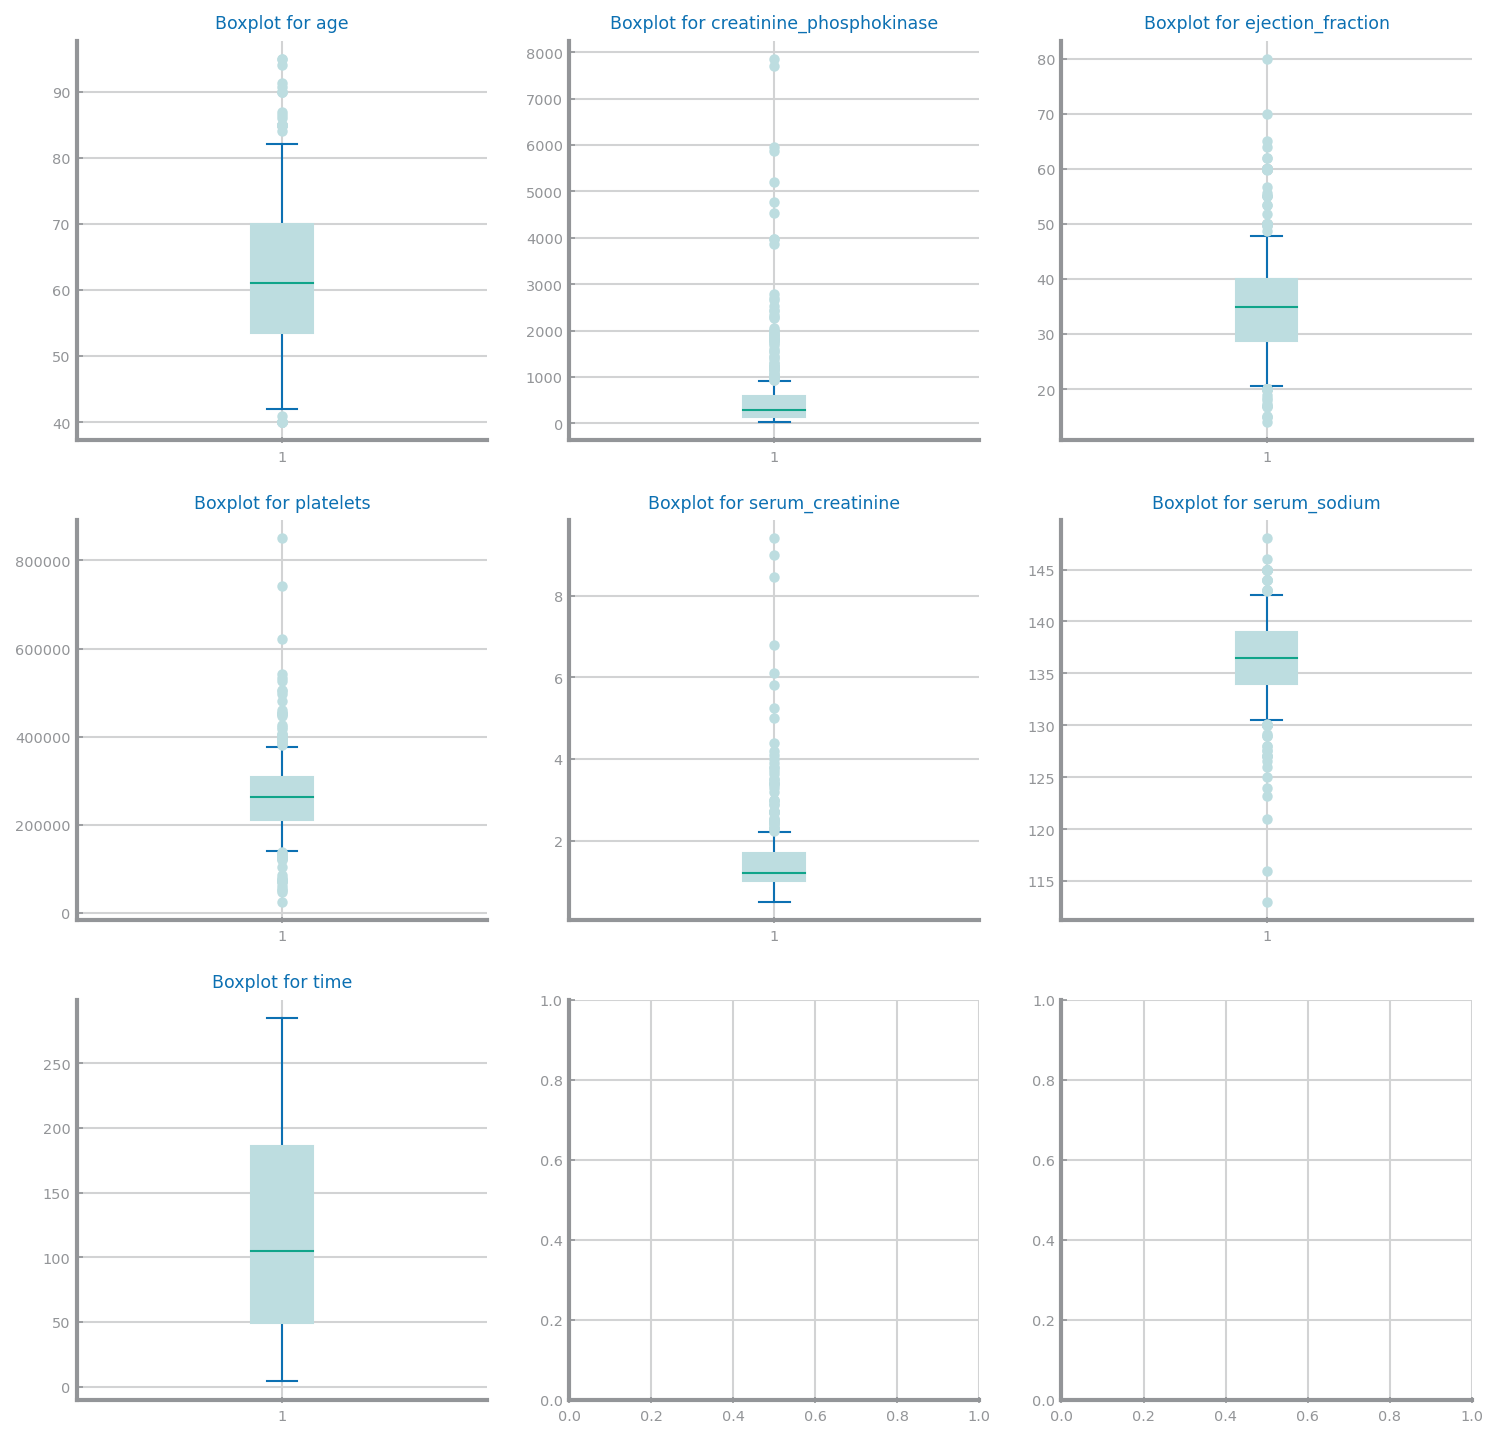

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582.0,20.0,265000.00,1.9,130.0,4.0
1,55.0,7861.0,38.0,263358.03,1.1,136.0,6.0
2,65.0,146.0,20.0,162000.00,1.3,129.0,7.0
3,50.0,111.0,20.0,210000.00,1.9,137.0,7.0
4,65.0,160.0,20.0,327000.00,2.7,116.0,8.0


In [22]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(7) #numero de variaveis non bolean
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

numeric_data = data
binary_data = data

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    #only boxplot non boolean vars

    if num_unique == 2:
        off+=1
        numeric_data = numeric_data.drop(columns=[data.columns[n]], axis=1) #Remove binary columns

    else:
        binary_data = binary_data.drop(columns=[data.columns[n]], axis=1) #Remove non-binary columns

        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

numeric_data.head()

Let us try to scale these values.

### Standard Scaler (Standardize)

In [23]:
transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(numeric_data)
scaledData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)

scaledData.describe(include='all')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02,4.060000e+02
mean,4.960455e-16,-1.016565e-16,3.226757e-17,-4.454565e-16,7.219184e-17,1.728707e-15,4.648717e-18
std,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00,1.001234e+00
min,-1.902544e+00,-6.079170e-01,-1.958149e+00,-2.530078e+00,-9.558939e-01,-5.444342e+00,-1.478952e+00
25%,-7.611243e-01,-4.953742e-01,-6.899460e-01,-5.522620e-01,-4.827761e-01,-5.544804e-01,-8.877376e-01
50%,-1.188857e-01,-3.228440e-01,-1.503887e-01,-3.002845e-03,-2.956737e-01,3.038015e-02,-1.571754e-01
75%,6.455394e-01,-1.441317e-02,2.812024e-01,4.784455e-01,1.795889e-01,6.097724e-01,9.147134e-01
max,2.768942e+00,7.713877e+00,3.723384e+00,6.219195e+00,7.465604e+00,2.705427e+00,2.216762e+00


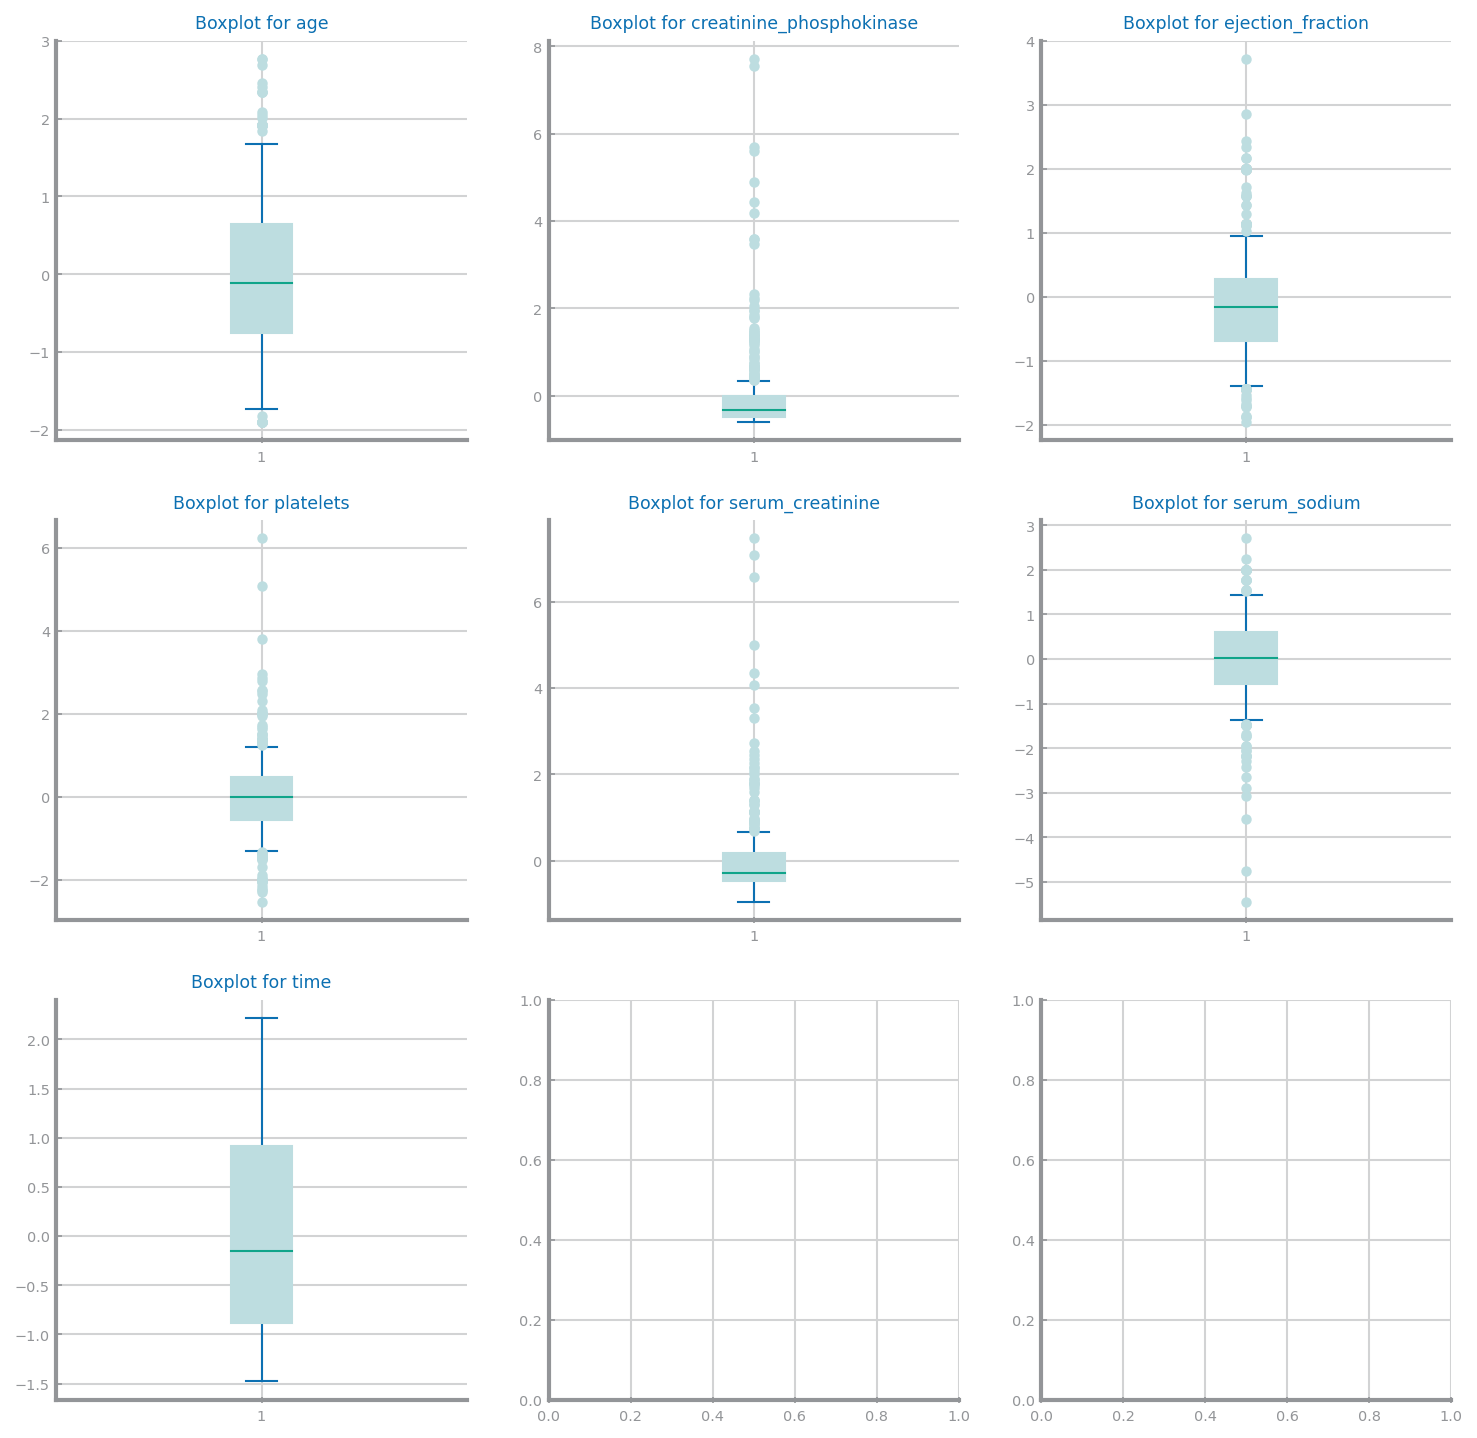

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.070220,-0.014413,-1.441646,0.014413,0.368836,-1.485883,-1.478952
1,-0.628502,7.713877,0.107863,-0.003003,-0.388152,-0.088779,-1.452648
2,0.220859,-0.477325,-1.441646,-1.078053,-0.198905,-1.718733,-1.439496
3,-1.053183,-0.514485,-1.441646,-0.568943,0.368836,0.144071,-1.439496
4,0.220859,-0.462461,-1.441646,0.672014,1.125825,-4.745791,-1.426344


In [24]:
numeric_vars = scaledData.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(7) #numero de variaveis non bolean
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(scaledData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(scaledData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

scaledData.head()

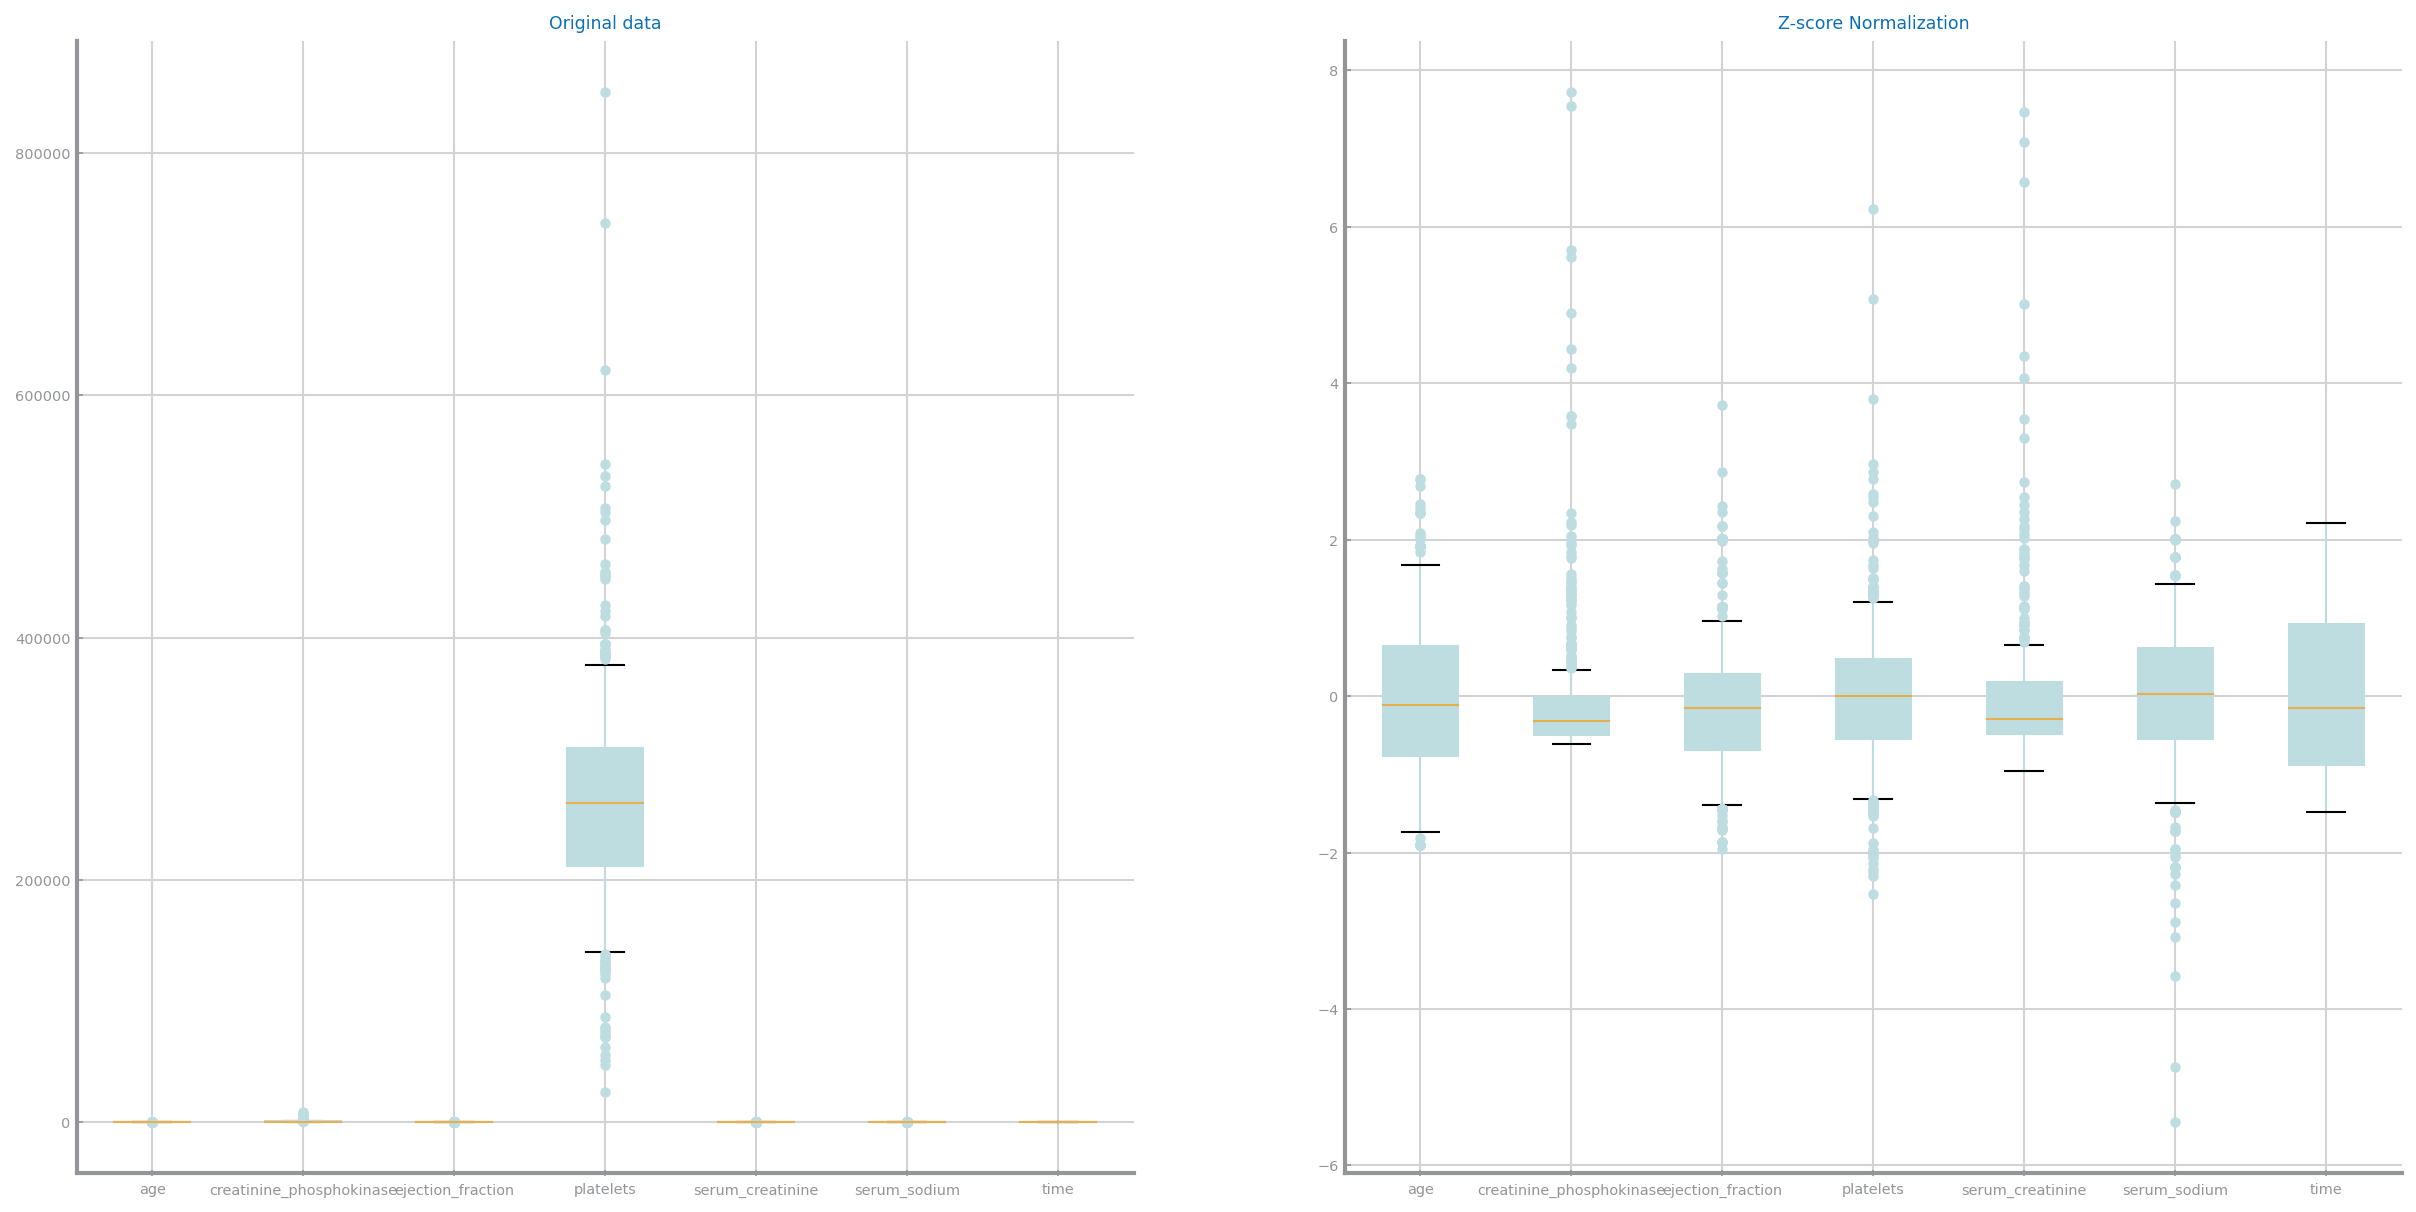

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(20,10),squeeze=False)

axs[0, 0].set_title('Original data')
numeric_data.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('Z-score Normalization')
scaledData.boxplot(ax=axs[0, 1])

### MinMax Scaler (Normalize)

In [26]:
transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,0.407267,0.073051,0.344652,0.289176,0.113506,0.668036,0.400180
std,0.214329,0.120315,0.176226,0.114436,0.118890,0.122854,0.270918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244338,0.013524,0.223215,0.226055,0.056180,0.600000,0.159973
50%,0.381818,0.034256,0.318182,0.288833,0.078397,0.671764,0.357651
75%,0.545455,0.071319,0.394146,0.343860,0.134831,0.742857,0.647687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


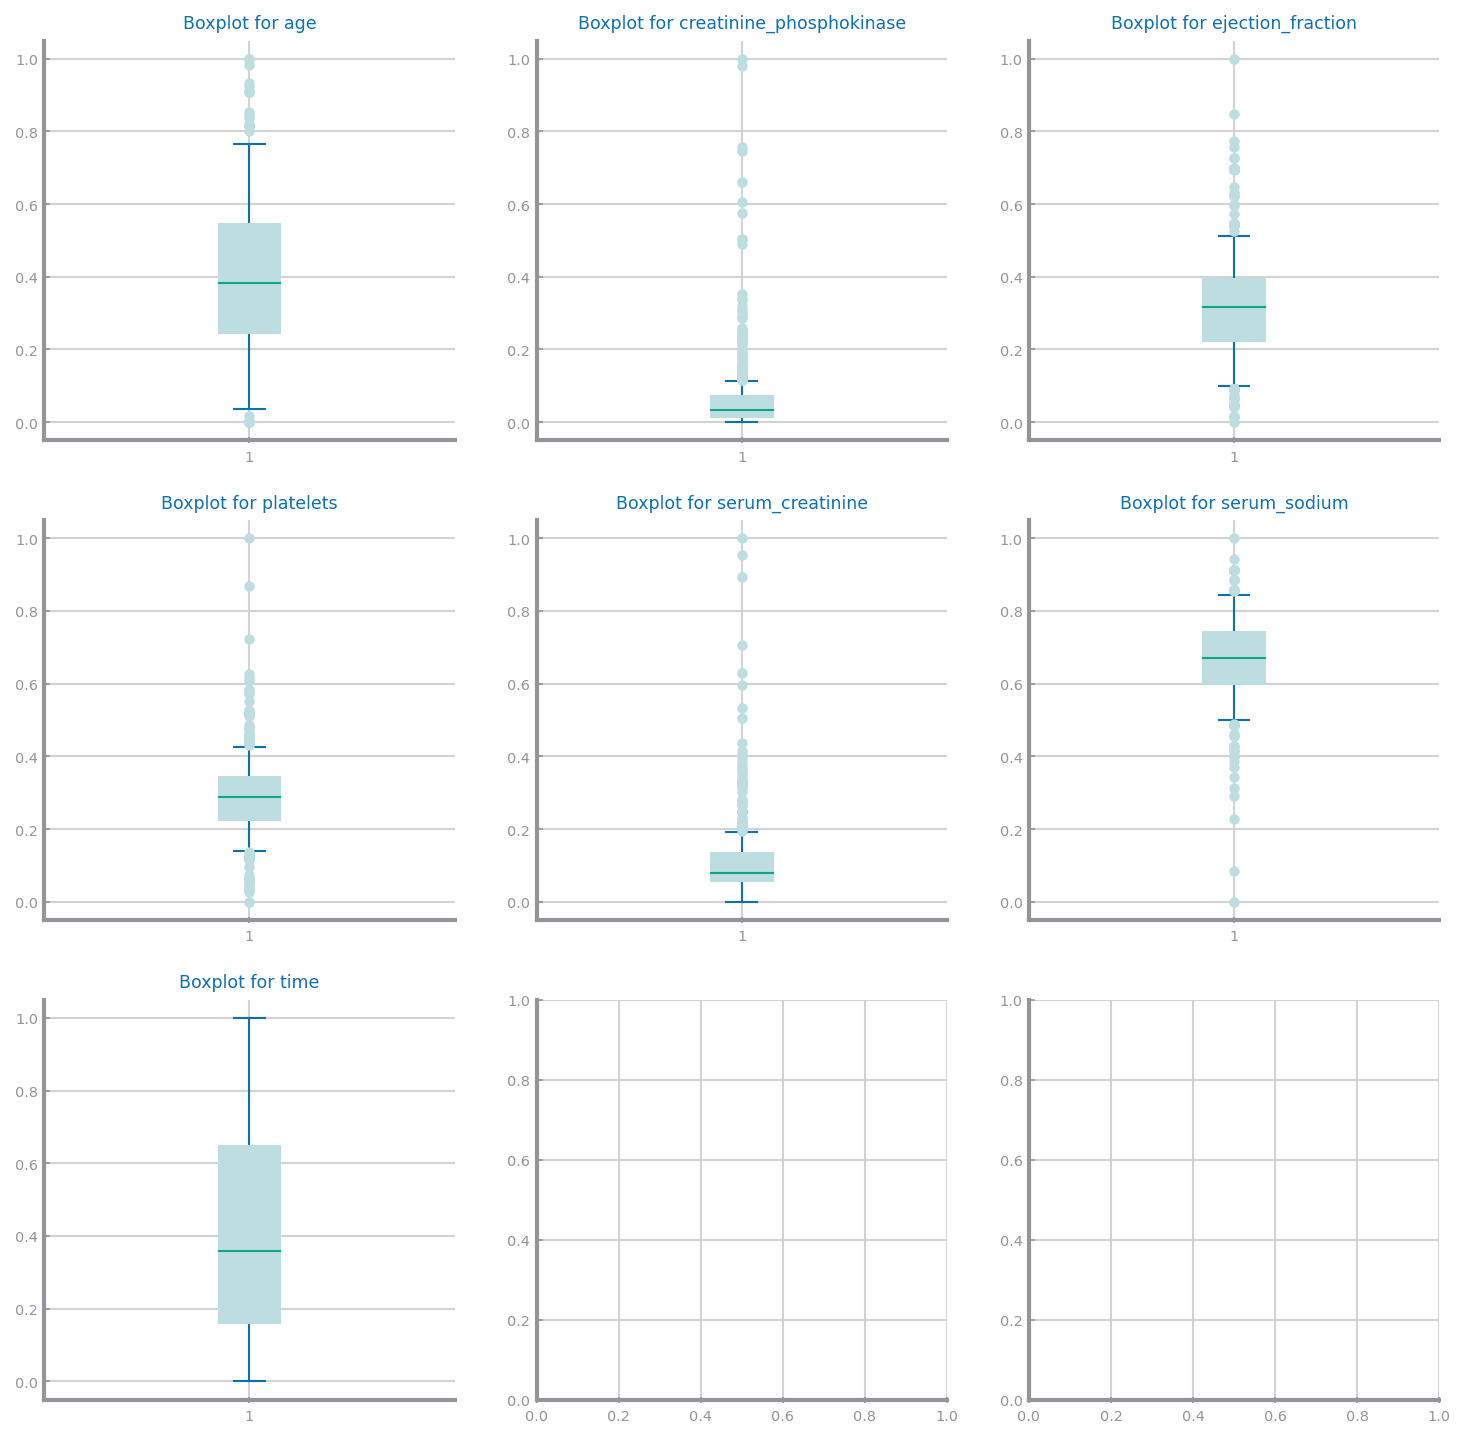

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


In [27]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(7) #numero de variaveis non bolean
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

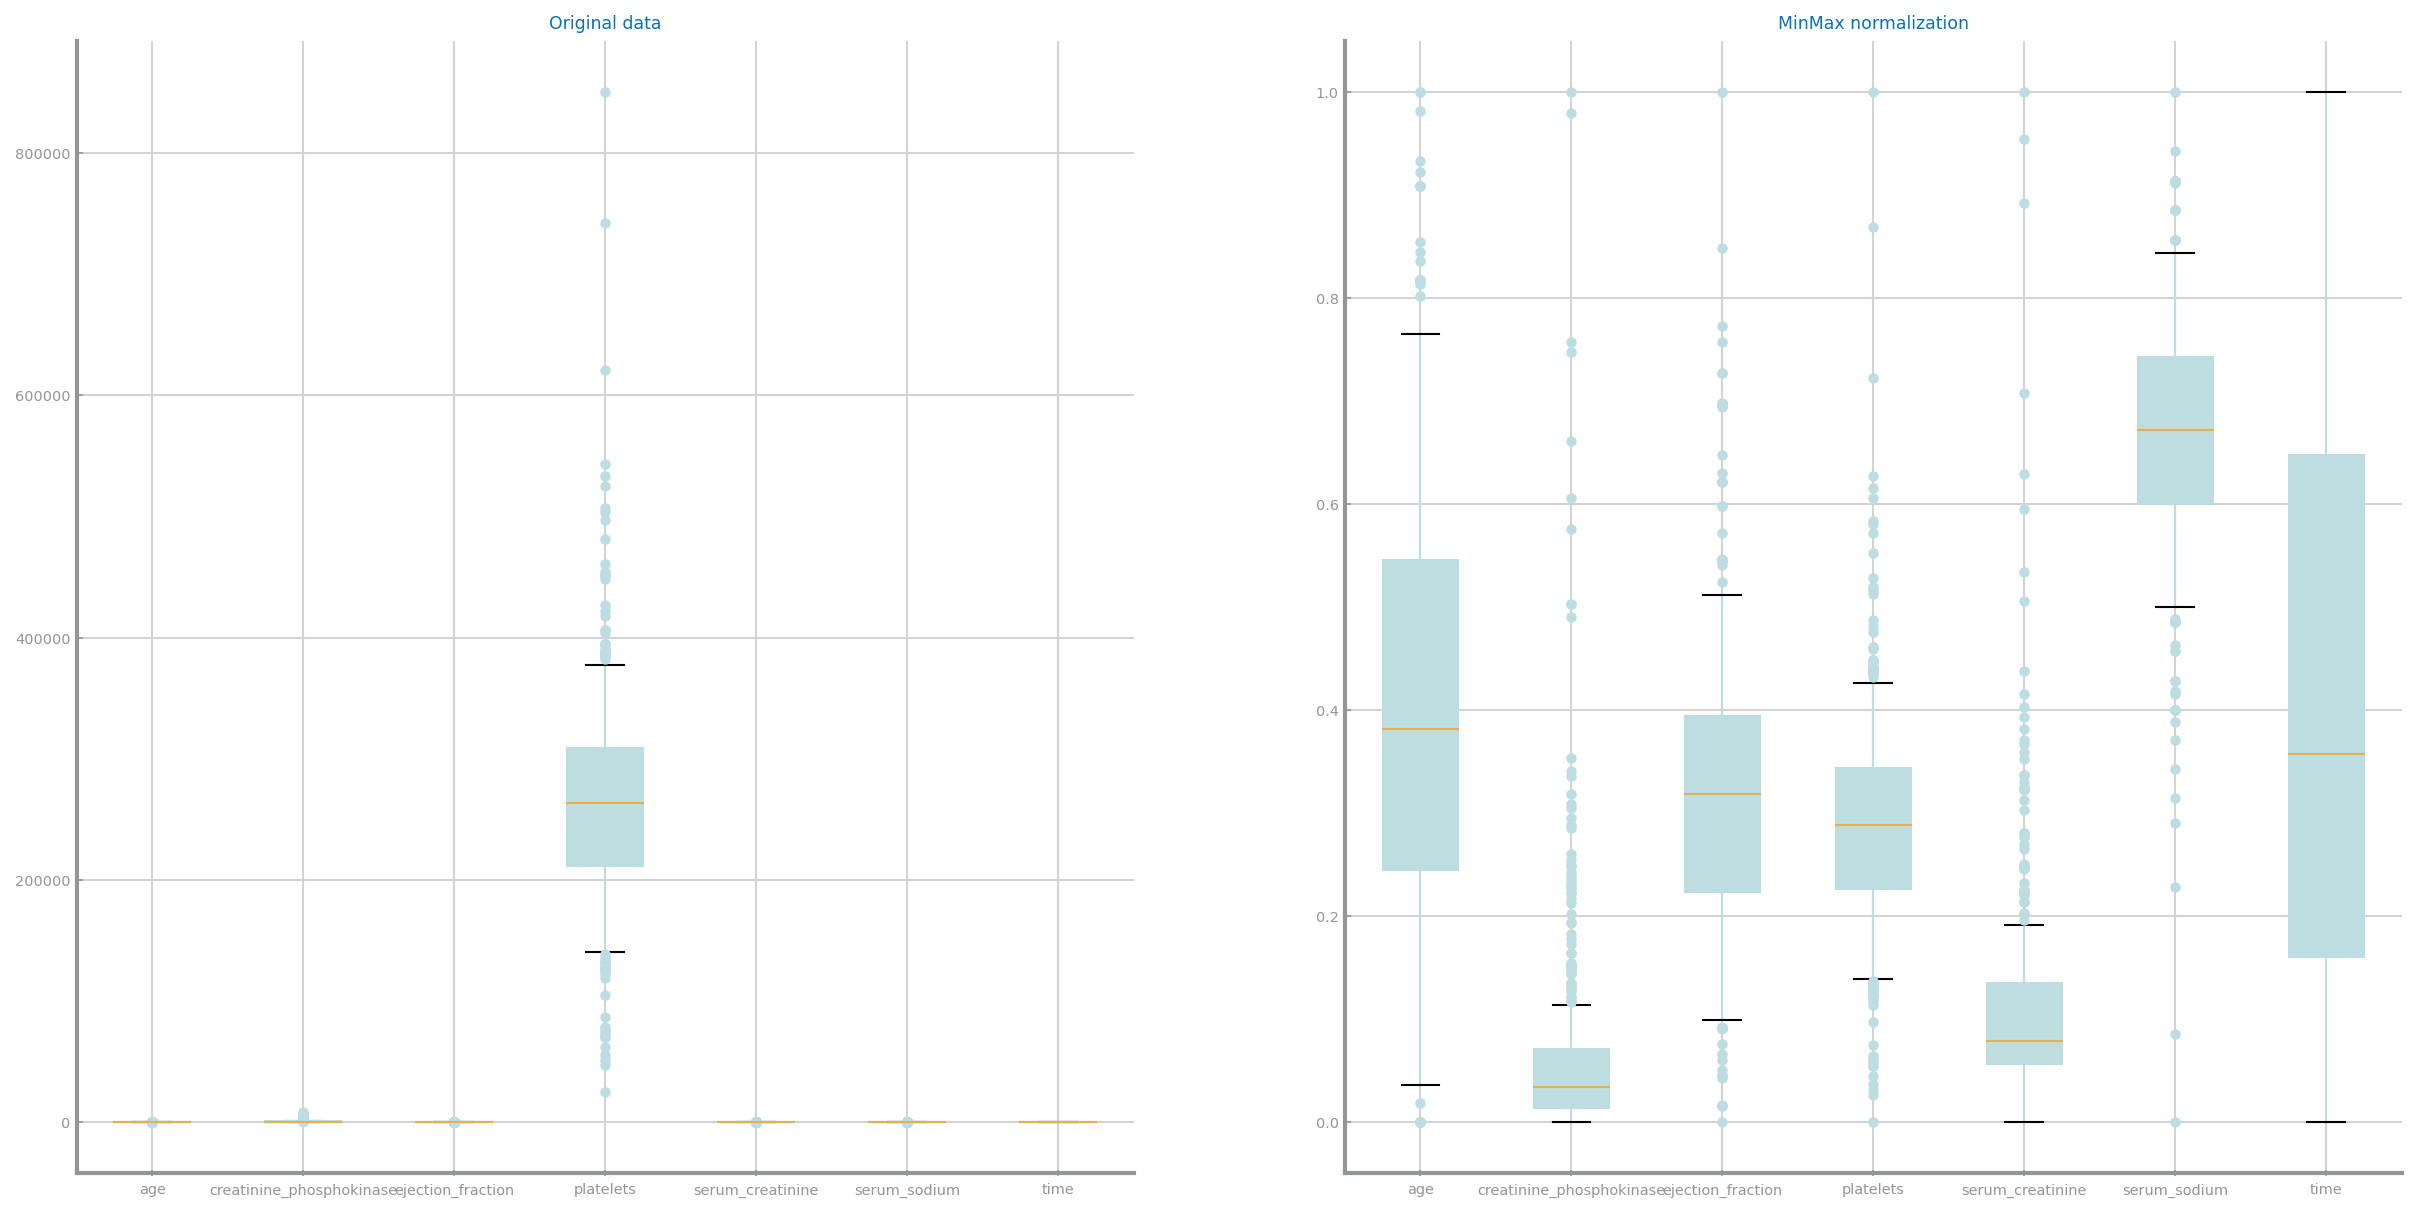

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20,10),squeeze=False)

axs[0, 0].set_title('Original data')
numeric_data.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('MinMax normalization')
minMaxData.boxplot(ax=axs[0, 1])

### Standard vs MinMax

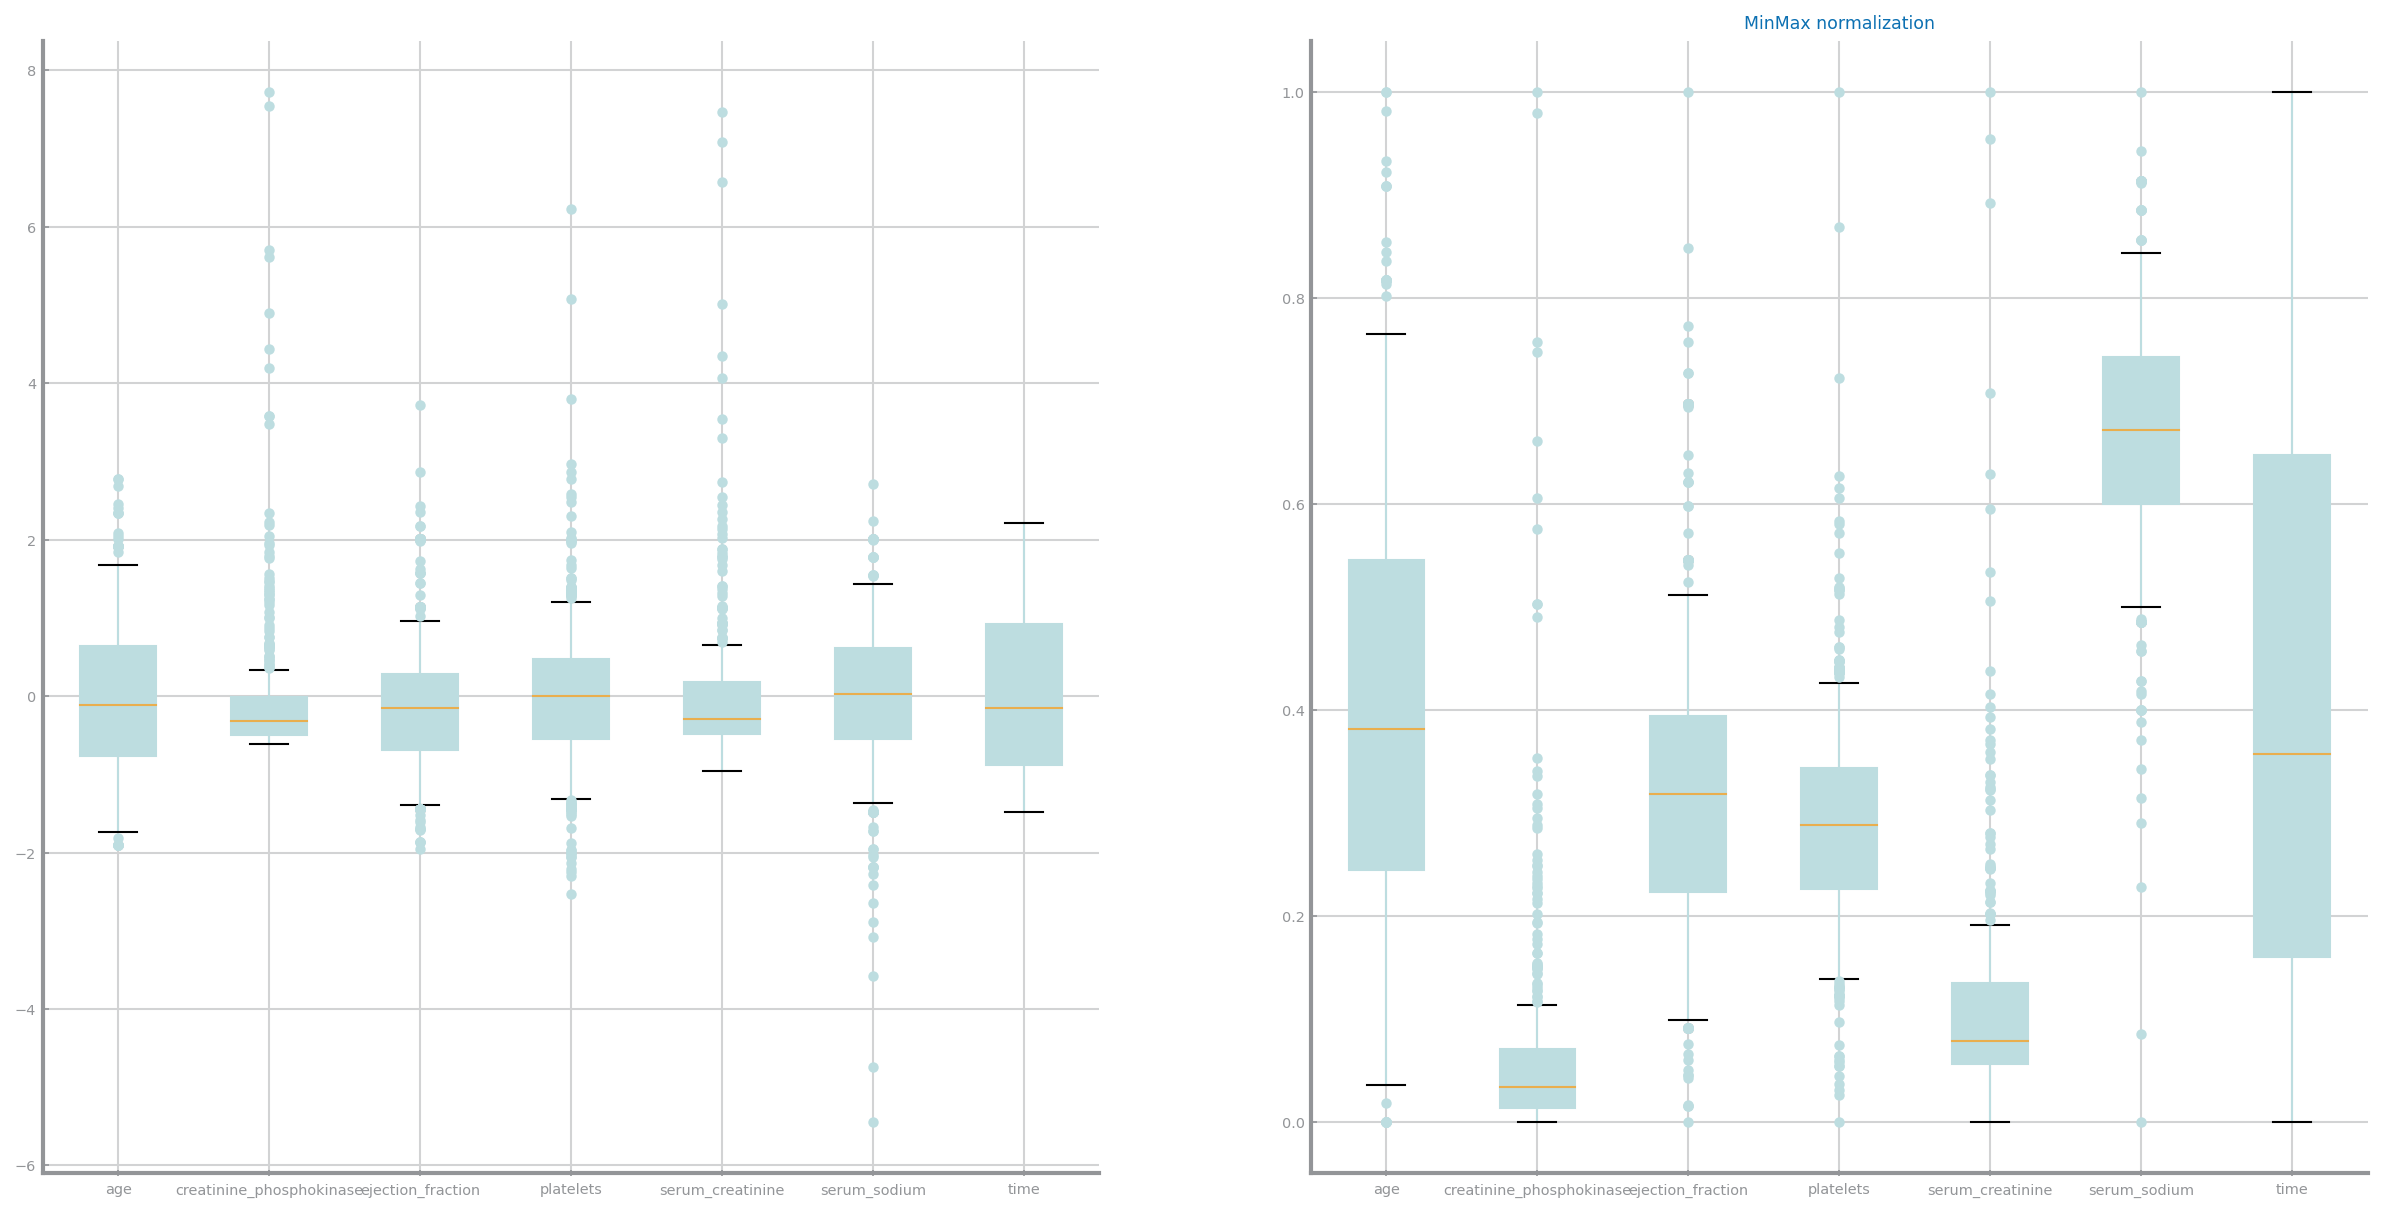

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(20,10),squeeze=False)

axs[0, 1].set_title('Z-score Normalization')
scaledData.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('MinMax normalization')
minMaxData.boxplot(ax=axs[0, 1])

### Storing scaled dataset

In [30]:
#Store MinMaxScaler
minMaxDataFull = minMaxData.join(binary_data, how='right')
minMaxDataFull.to_csv(r'../datasets/hf_scaled/HF_balanced_normalized.csv', index = False)

#Store StandardScaler
scaledDataFull = scaledData.join(binary_data, how='right')
scaledDataFull.to_csv(r'../datasets/HF_balanced_standardized.csv', index = False)

<br />
<br />
<br />
<br />

## QSAR Oral Toxicity Dataset

This dataset is composed of purely binary values, hence, there is no point in scaling them.